Author: Martin Loza

Date: 24/01/06

I tried to visualize the final average matrices, but something was weird, like the maximum values were over 1500. I would like to confirm the distribution of data on different resolutions by chromosome.


In [1]:
# Init libraries
import cooler
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import gc


scaler = StandardScaler()

# Global variables
data_dir = "/mnt/c/Users/Marti/Documents/Projects/HK_Interactions/Data/HiC/4DN_portal/average/01_bedpe/"
out_dir = "/mnt/c/Users/Marti/Documents/Projects/HK_Interactions/Data/HiC/4DN_portal/average/tests/"

# Local functions


Let's load the precalculated average matrices. We need to do one at the time, then plot the histograms by chromosome.

In [2]:
# Define the chromosomes to analyse
# chromosomes = ['chr14']
chromosomes = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17','chr18','chr19','chr20','chr21','chr22','chrX']

# Define the resolutions to use
resolutions = [1000000, 500000, 250000, 100000, 50000, 25000, 10000, 5000, 2000]
# resolutions = [1000000]
# resolutions = [ 100000, 50000, 25000, 10000,  5000, 2000, 1000]
# resolutions = ['1000', '10000', '100000', '1000000', '2000', '25000', '250000', '2500000', '5000', '50000', '500000', '5000000']
resolutions

[1000000, 500000, 250000, 100000, 50000, 25000, 10000, 5000, 2000]

Let's try to further optimize the process by scaling and averaing by chromosome

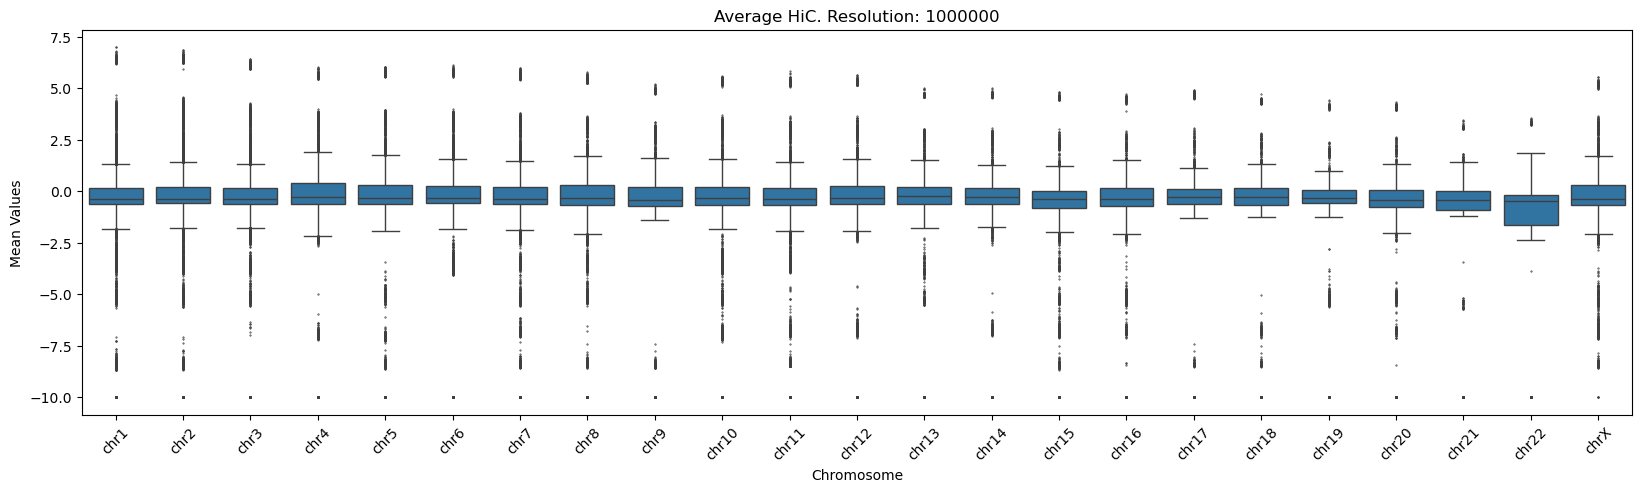

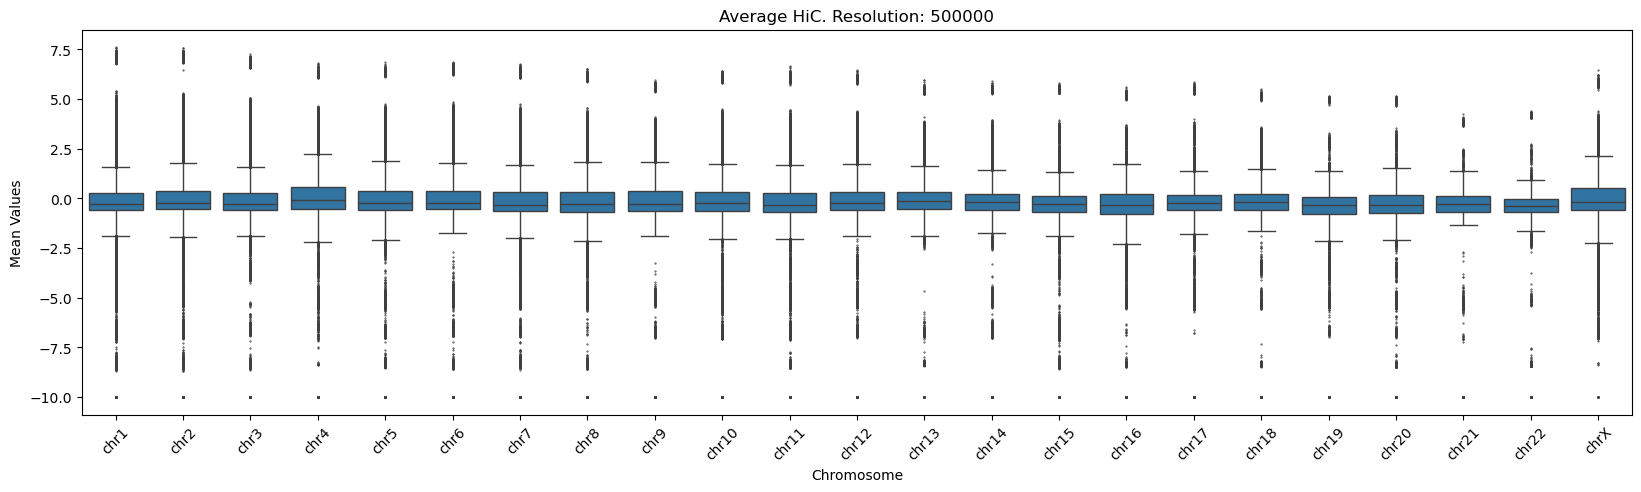

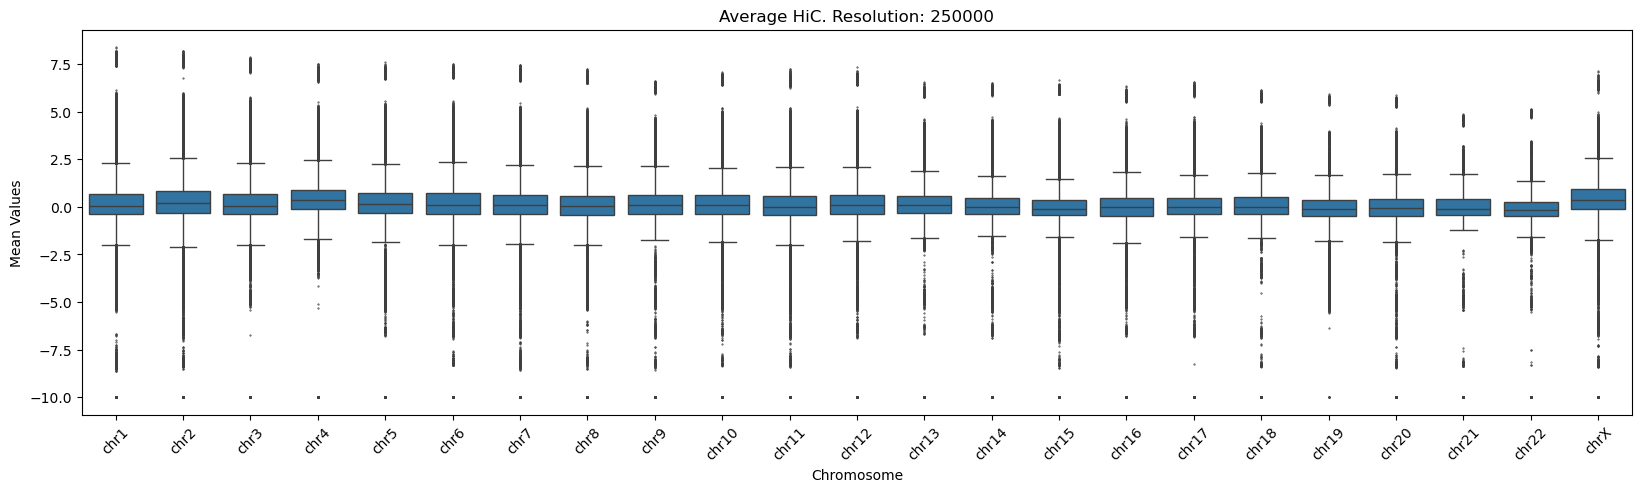

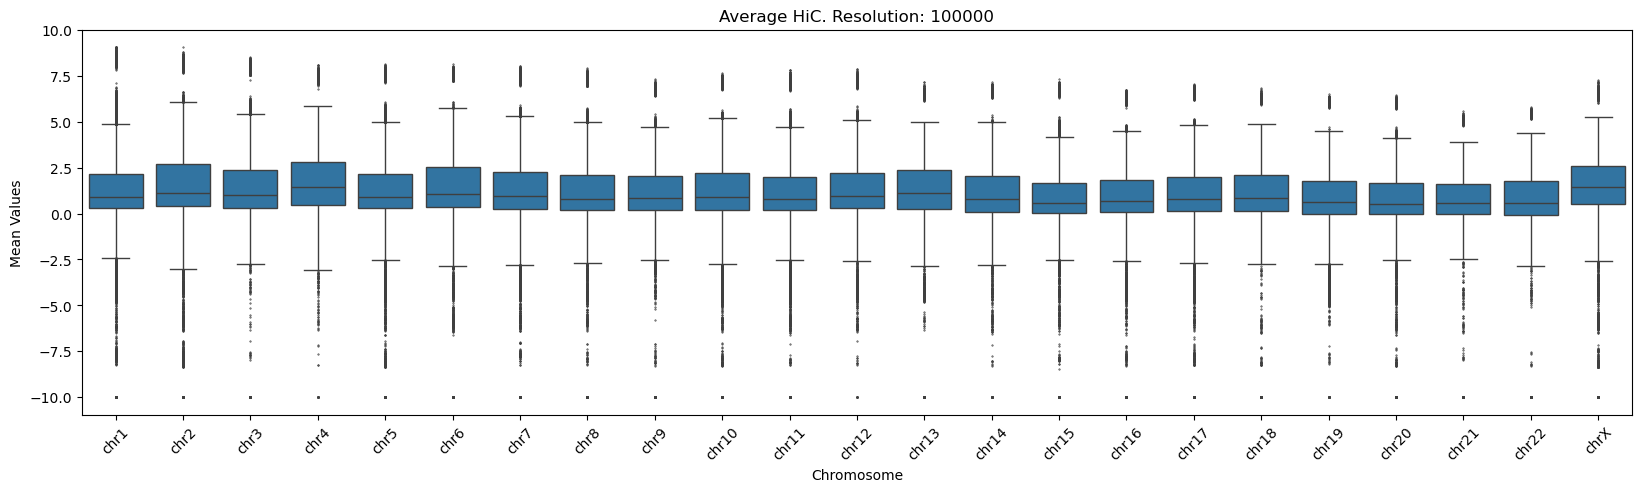

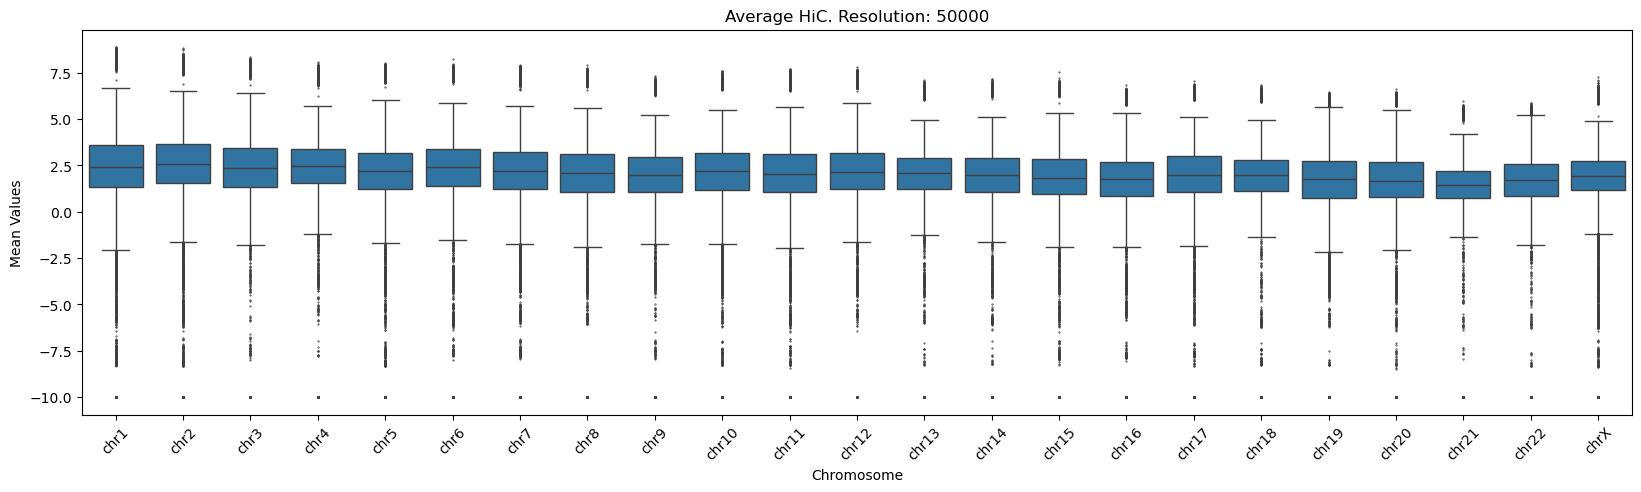

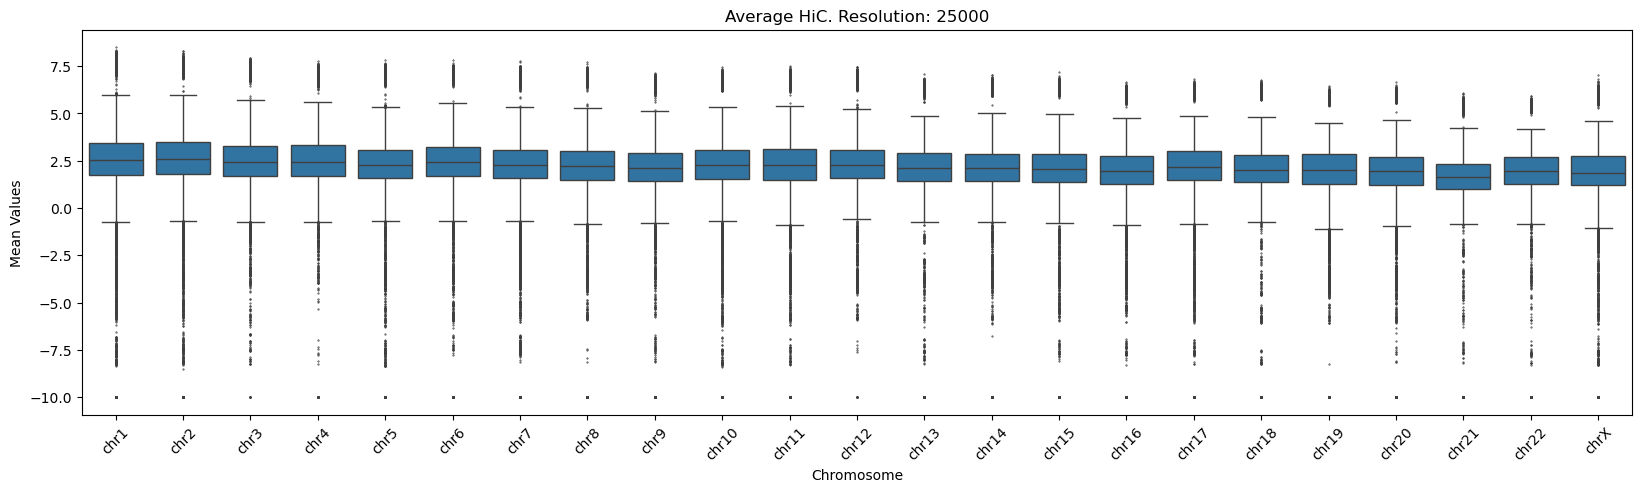

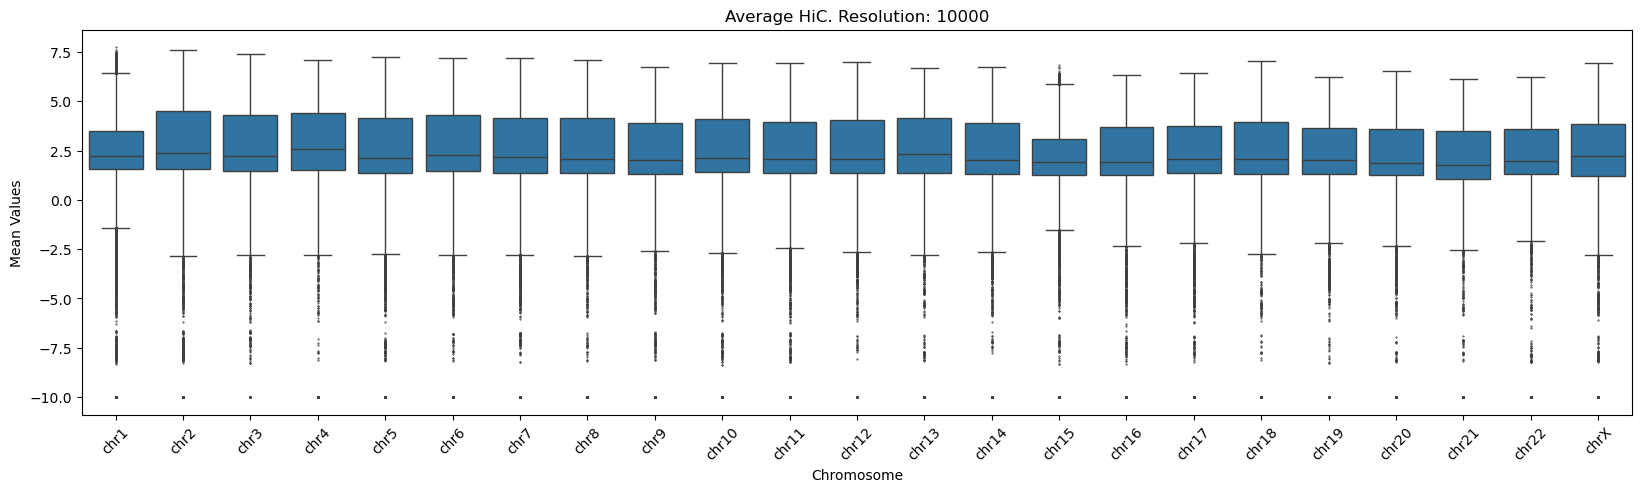

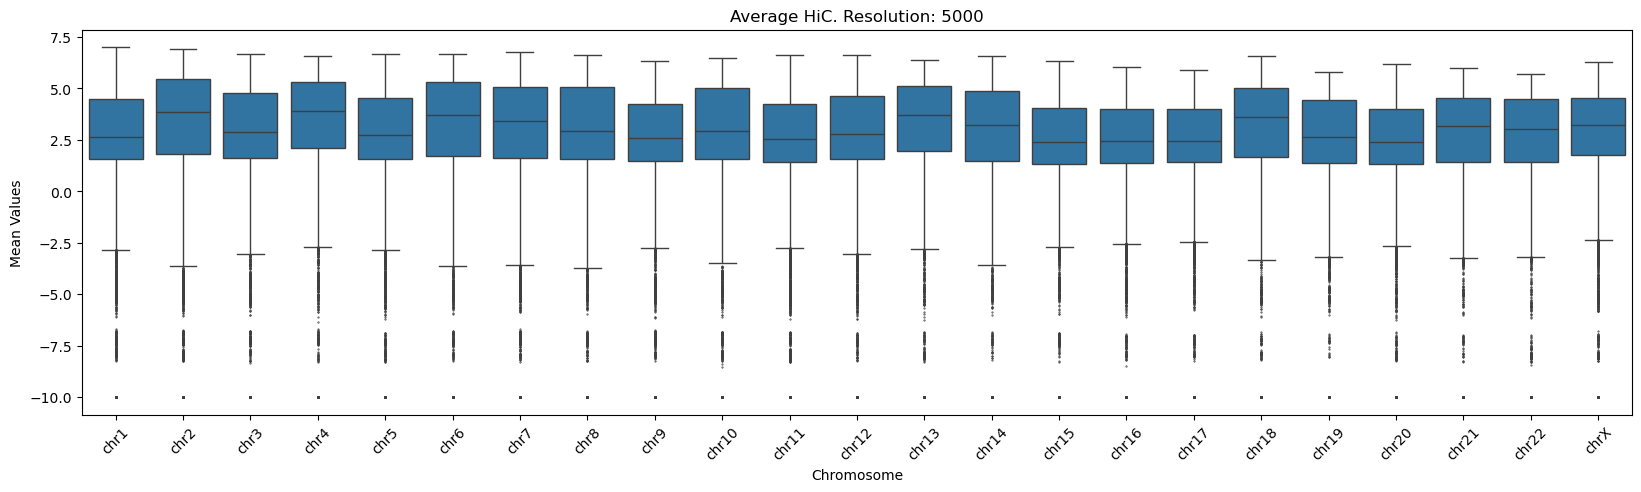

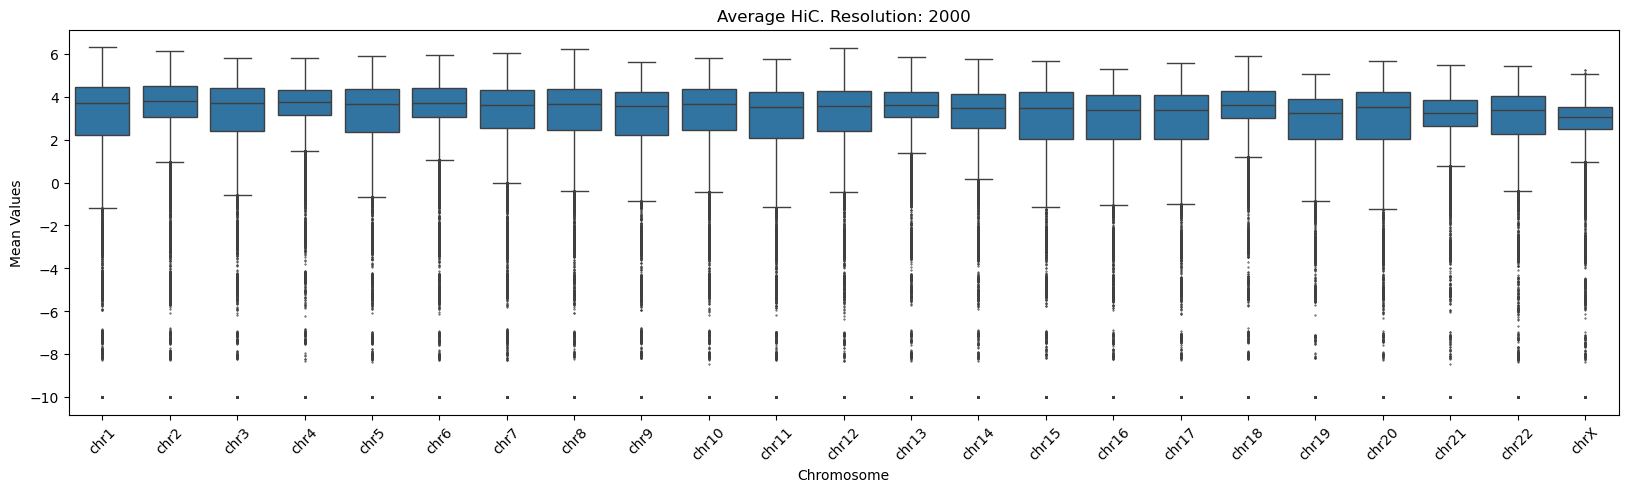

In [19]:
# For resolution in resolutions:
for resolution in resolutions:

    # Load the average_matrix stored in the input directory
    average_matrix = pd.read_csv(data_dir + f"average_matrix_{resolution}.bed", sep='\t', 
                                header=None, names=['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2', 'mean'])

    # Plot the boxplots by chromosomes
    plt.figure(figsize=(20, 5))
    sns.boxplot(data=average_matrix, x='chrom1', y='mean', fliersize=0.5 )
    plt.title('Average HiC. Resolution: ' + str(resolution))
    plt.xlabel('Chromosome')
    plt.ylabel('Mean Values')
    plt.xticks(rotation=45)
    plt.show()

    del average_matrix
    gc.collect()
    

This kind of look OK....

When calculating the cool files, it says there are some duplicated elements. Let's investigate this

In [23]:
# load average matrix of 100Kb
average_matrix = pd.read_csv(data_dir + f"average_matrix_250000.bed", sep='\t', 
                                header=None, names=['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2', 'mean'])

In [24]:
average_matrix[:]

,chrom1,start1,end1,chrom2,start2,end2,mean
0,chr1,0,250000,chr1,0,250000,-10.000000
1,chr1,0,250000,chr1,248750000,248956422,-10.000000
2,chr1,250000,500000,chr1,250000,500000,-10.000000
3,chr1,500000,750000,chr1,500000,750000,-10.000000
4,chr1,500000,750000,chr1,750000,1000000,-10.000000
...,...,...,...,...,...,...,...
78301,chr1,70000000,70250000,chr1,166500000,166750000,-0.422161
78302,chr1,70000000,70250000,chr1,166750000,167000000,-0.614935
78303,chr1,70000000,70250000,chr1,167250000,167500000,-0.643286
78304,chr1,70000000,70250000,chr1,168000000,168250000,-0.225789


In [25]:
# Let's check duplicated rows
average_matrix[average_matrix.duplicated(keep=False)].sort_values(by=['start1', 'start2'])

,chrom1,start1,end1,chrom2,start2,end2,mean


In [20]:
# Get the index of duplicated rows
dup_idx = average_matrix[average_matrix.duplicated].index
dup_idx

Index([359380, 732190, 732196, 732212], dtype='int64')

In [21]:
# if dup_idx is not empty, drop the duplicated rows
if dup_idx.empty == False:
    average_matrix.drop(dup_idx, inplace=True)

In [22]:
average_matrix[average_matrix.duplicated(keep=False)].sort_values(by=['start1', 'start2'])

,chrom1,start1,end1,chrom2,start2,end2,mean


In [10]:
average_matrix[:]

,chrom1,start1,end1,chrom2,start2,end2,mean
0,chr1,0,100000,chr1,0,100000,-10.000000
1,chr1,100000,200000,chr1,100000,200000,-10.000000
2,chr1,200000,300000,chr1,200000,300000,-10.000000
3,chr1,600000,700000,chr1,600000,700000,-10.000000
4,chr1,700000,800000,chr1,700000,800000,-10.000000
...,...,...,...,...,...,...,...
975646,chrX,155800000,155900000,chrX,155800000,155900000,6.420291
975647,chrX,155800000,155900000,chrX,155900000,156000000,4.134087
975648,chrX,155900000,156000000,chrX,155900000,156000000,6.580029
975649,chrX,155900000,156000000,chrX,156000000,156040895,-4.732035
